Detect and score fraudulent transactions in near-real time using supervised and unsupervised techniques, handle big data, and quantify profit vs loss impact.


In [20]:
import zipfile
with zipfile.ZipFile("/content/archive.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")

In [21]:
import os
os.listdir("/content/")

['.config', 'creditcard.csv', 'archive.zip', 'sample_data']

In [23]:
#Import Libraries & Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [24]:
#Basic Information About Dataset
print(df.shape)
df.info()
df.describe()

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Class
0    284315
1       492
Name: count, dtype: int64


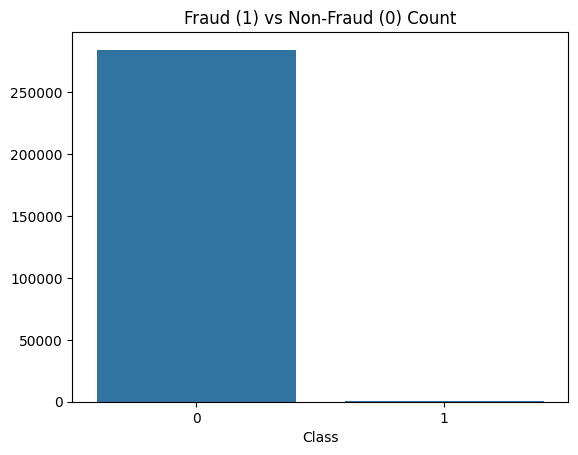

In [25]:
#Check Class Imbalance
class_counts = df['Class'].value_counts()
print(class_counts)
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Fraud (1) vs Non-Fraud (0) Count")
plt.show()

In [26]:
#Percentage of Fraud
fraud_percentage = df['Class'].value_counts(normalize=True) * 100
fraud_percentage

,proportion
Class,
0,99.827251
1,0.172749


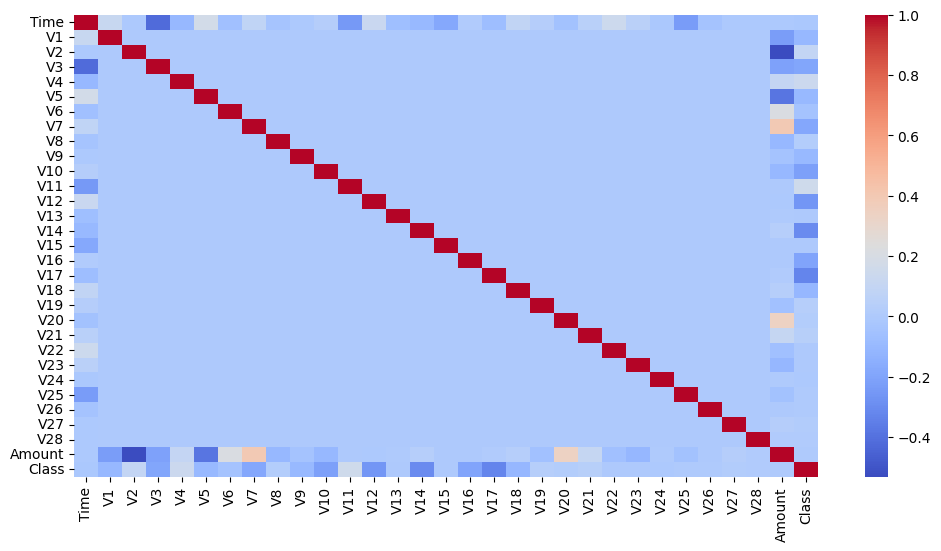

In [27]:
#Correlation HeatMap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.show()

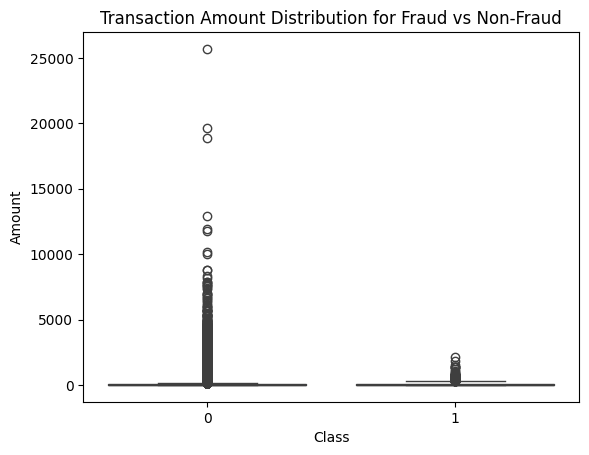

In [28]:
#Fraud vs Non-Fraud Amount Comparison
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Transaction Amount Distribution for Fraud vs Non-Fraud")
plt.show()

In [29]:
#Scale Features
from sklearn.preprocessing import StandardScaler
df_fe = df.copy()
scaler = StandardScaler()
df_fe['scaled_amount'] = scaler.fit_transform(df_fe[['Amount']])
df_fe['scaled_time'] = scaler.fit_transform(df_fe[['Time']])
df_fe.drop(['Amount','Time'], axis=1, inplace=True)
df_fe.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [30]:
#Creating Advanced Features (Real-World Fraud Engineering)
df_fe['transaction_id'] = df_fe.index
df_fe['rolling_mean_amount'] = df_fe['scaled_amount'].rolling(window=10).mean().fillna(0)
df_fe['rolling_std_amount'] = df_fe['scaled_amount'].rolling(window=10).std().fillna(0)

In [31]:
#Time-of-Day Feature (Fraud typically spikes at night)
df_fe['hour'] = (df['Time'] % (24*3600)) // 3600

In [32]:
#Amount Z-Score Feature
df_fe['amount_zscore'] = (df_fe['scaled_amount'] - df_fe['scaled_amount'].mean()) / df_fe['scaled_amount'].std()

In [33]:
#Rare Transaction Reader
df_fe['rare_transaction'] = (df_fe['scaled_amount'] > 2).astype(int)

In [34]:
#Missing VAlue Check
df_fe.isnull().sum().sum()

np.int64(0)

In [35]:
#Final Feature
X = df_fe.drop(['Class'], axis=1)
y = df_fe['Class']

In [36]:
print("Final feature count:", X.shape[1])
X.head()

Final feature count: 36


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V27,V28,scaled_amount,scaled_time,transaction_id,rolling_mean_amount,rolling_std_amount,hour,amount_zscore,rare_transaction
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.133558,-0.021053,0.244964,-1.996583,0,0.0,0.0,0.0,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.008983,0.014724,-0.342475,-1.996583,1,0.0,0.0,0.0,-0.342474,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.055353,-0.059752,1.160686,-1.996562,2,0.0,0.0,0.0,1.160684,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.062723,0.061458,0.140534,-1.996562,3,0.0,0.0,0.0,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.219422,0.215153,-0.073403,-1.996541,4,0.0,0.0,0.0,-0.073403,0


In [37]:
#Load Data and Basic Preparation
import pandas as pd
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [38]:
#Train Test Split
from sklearn.model_selection import train_test_split
X = df.drop("Class", axis=1)
y = df["Class"]
# Time-based split (first 80% = training, last 20% = testing)
split_index = int(len(df) * 0.80)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

In [39]:
#Isolation Forest Model
from sklearn.ensemble import IsolationForest
iso = IsolationForest(
    n_estimators=200,
    contamination=0.002,  # based on class imbalance
    random_state=42
)
iso.fit(X_train)
# anomaly scores (lower = more anomalous)
iso_scores_train = -iso.score_samples(X_train)
iso_scores_test = -iso.score_samples(X_test)

In [42]:
import pandas as pd
df = pd.read_csv("creditcard.csv")
X = df.drop("Class", axis=1)
y = df["Class"]
split_index = int(len(df) * 0.80)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

In [43]:
import pandas as pd
df = pd.read_csv("creditcard.csv")
X = df.drop("Class", axis=1)
y = df["Class"]
split_index = int(len(df) * 0.80)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

In [44]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(
    n_estimators=200,
    contamination=0.002,
    random_state=42
)
iso.fit(X_train)
# anomaly scores
iso_scores_train = -iso.score_samples(X_train)
iso_scores_test = -iso.score_samples(X_test)
# ADD COLUMN HERE BEFORE MOVING ON
X_train["iso_score"] = iso_scores_train
X_test["iso_score"] = iso_scores_test

/tmp/ipython-input-2689258847.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["iso_score"] = iso_scores_train
/tmp/ipython-input-2689258847.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["iso_score"] = iso_scores_test


In [45]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,iso_score
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.381752
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.367503
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.467451
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.415749
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.393827


In [46]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(columns=["iso_score"]))
X_test_scaled = scaler.transform(X_test.drop(columns=["iso_score"]))
input_dim = X_train_scaled.shape[1]
autoencoder = Sequential([
    Dense(16, activation='relu', input_shape=(input_dim,)),
    Dense(8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(input_dim, activation='linear')
])
autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(
    X_train_scaled, X_train_scaled,
    epochs=15, batch_size=256,
    validation_data=(X_test_scaled, X_test_scaled),
    verbose=1
)
# reconstruction error → anomaly score
recon_train = autoencoder.predict(X_train_scaled)
recon_test = autoencoder.predict(X_test_scaled)
mse_train = np.mean(np.power(X_train_scaled - recon_train, 2), axis=1)
mse_test = np.mean(np.power(X_test_scaled - recon_test, 2), axis=1)
X_train["ae_score"] = mse_train
X_test["ae_score"] = mse_test

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
891/891 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.8785 - val_loss: 0.6720
Epoch 2/15
891/891 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.5811 - val_loss: 0.5786
Epoch 3/15
891/891 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.5142 - val_loss: 0.5477
Epoch 4/15
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4906 - val_loss: 0.5396
Epoch 5/15
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4757 - val_loss: 0.5262
Epoch 6/15
891/891 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4623 - val_loss: 0.5135
Epoch 7/15
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4549 - val_loss: 0.5037
Epoch 8/15
891/891 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.4441 - val_loss: 0.5015
Epoch 9/15
891/891 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.4429 - val_loss: 0.4949
Epoch 10/15
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4379 - val_loss: 0.4928
Epoch 11/15
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4383 - val_loss: 0.4906
Epoch 12/15
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/ste

/tmp/ipython-input-3827799457.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["ae_score"] = mse_train
/tmp/ipython-input-3827799457.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["ae_score"] = mse_test


In [47]:
#create ensembles score
X_train["ensemble_score"] = (X_train["iso_score"] + X_train["ae_score"]) / 2
X_test["ensemble_score"] = (X_test["iso_score"] + X_test["ae_score"]) / 2

/tmp/ipython-input-1983157985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["ensemble_score"] = (X_train["iso_score"] + X_train["ae_score"]) / 2
/tmp/ipython-input-1983157985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["ensemble_score"] = (X_test["iso_score"] + X_test["ae_score"]) / 2


In [48]:
X_train.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,iso_score,ae_score,ensemble_score
227840,145244.0,2.028950,-0.374089,-1.268051,0.349127,-0.057977,-0.515489,-0.087045,-0.146316,1.001341,...,0.080683,0.727965,0.070118,0.723291,-0.083032,-0.061277,24.95,0.375763,0.144129,0.259946
227841,145245.0,0.306600,1.116021,-0.047348,3.593785,2.079047,5.748707,-2.059246,-1.352120,-1.849240,...,0.258831,0.639005,-0.048250,0.144586,0.216385,0.304545,0.76,0.472399,0.789575,0.630987
227842,145245.0,-1.781954,2.062680,-3.758871,-1.801001,-0.084365,1.919610,-1.454364,-9.825473,-2.073119,...,-0.339706,-0.216688,-1.555393,0.655873,0.777662,0.272753,359.28,0.520114,1.108238,0.814176
227843,145245.0,-0.061507,1.024900,-0.170060,-0.263220,0.982164,-1.162749,1.468942,-0.648407,-0.157586,...,-0.296209,-0.140335,-0.465171,-0.197933,-0.048916,0.023871,39.40,0.381483,0.196662,0.289072
227844,145247.0,2.050034,-0.103557,-1.204713,0.207198,0.108850,-0.665621,0.073598,-0.164464,0.303531,...,0.280573,-0.405691,-0.274672,0.202719,-0.074529,-0.074279,0.17,0.374448,0.145732,0.260090


In [49]:
!pip install xgboost imbalanced-learn

In [50]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
# Oversample fraud cases using SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)
model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=10,  # balance fraud vs non-fraud
    random_state=42
)
model.fit(X_resampled, y_resampled)
# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

ROC AUC Score: 0.9757112638505575

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56887
           1       0.17      0.84      0.28        75

    accuracy                           0.99     56962
   macro avg       0.58      0.92      0.64     56962
weighted avg       1.00      0.99      1.00     56962



In [51]:
import numpy as np
from sklearn.metrics import confusion_matrix
# Cost settings (you can adjust later)
cost_fn = 10000  # fraud missed
cost_fp = 300    # false alert
thresholds = np.arange(0.01, 0.50, 0.01)
results = []
for t in thresholds:
    preds = (y_proba > t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    total_cost = (fn * cost_fn) + (fp * cost_fp)
    recall = tp / (tp + fn)
    results.append((t, fp, fn, recall, total_cost))
results_df = pd.DataFrame(results, columns=["Threshold", "FP", "FN", "Recall", "Business_Cost"])
results_df.sort_values("Business_Cost").head(10)

,Threshold,FP,FN,Recall,Business_Cost
48,0.49,322,12,0.84,216600
47,0.48,335,12,0.84,220500
46,0.47,345,12,0.84,223500
45,0.46,362,12,0.84,228600
44,0.45,373,12,0.84,231900
43,0.44,387,12,0.84,236100
42,0.43,403,12,0.84,240900
41,0.42,418,12,0.84,245400
40,0.41,434,12,0.84,250200
39,0.40,450,12,0.84,255000
